Bayes Factor (H1/H0): 2.069
Evidence supports H1 (biased coin).


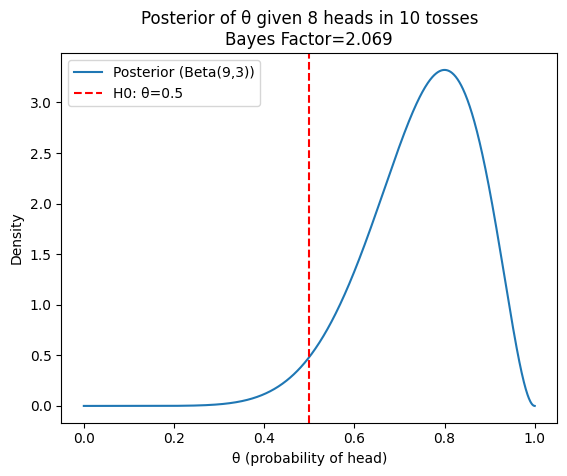

In [4]:
import numpy as np
from scipy.stats import beta, binom

# Data
n = 10
x = 8  # number of heads

# Hypotheses
theta0 = 0.5  # H0: fair coin

# Likelihood under H0
L0 = binom.pmf(x, n, theta0)

# Likelihood under H1 with uniform prior Beta(1,1)
# Integrate likelihood over theta
theta = np.linspace(0,1,1000)
prior = beta.pdf(theta, 1, 1)
likelihood = binom.pmf(x, n, theta)
L1 = np.trapezoid(likelihood * prior, theta)

# Bayes factor
BF10 = L1 / L0
print(f"Bayes Factor (H1/H0): {BF10:.3f}")

if BF10 < 1:
    print("Evidence supports H0 (fair coin).")
else:
    print("Evidence supports H1 (biased coin).")

# Visualization
import matplotlib.pyplot as plt
posterior = beta.pdf(theta, x+1, n-x+1)
plt.plot(theta, posterior, label="Posterior (Beta(9,3))")
plt.axvline(0.5, color='r', linestyle='--', label="H0: θ=0.5")
plt.title(f"Posterior of θ given 8 heads in 10 tosses\nBayes Factor={BF10:.3f}")
plt.xlabel("θ (probability of head)")
plt.ylabel("Density")
plt.legend()
plt.show()